# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.993298e+01     7.838122e+00
 * time: 0.038313865661621094
     1     2.799655e+01     4.569450e+00
 * time: 0.04391193389892578
     2     2.079581e+01     6.149958e+00
 * time: 0.05033588409423828
     3     1.554670e+01     5.559776e+00
 * time: 0.05669999122619629
     4     1.210279e+01     2.995200e+00
 * time: 0.06304097175598145
     5     1.115007e+01     3.430960e+00
 * time: 0.06817793846130371
     6     1.002850e+01     1.487163e+00
 * time: 0.07332301139831543
     7     9.115409e+00     1.398345e+00
 * time: 0.07877182960510254
     8     8.672198e+00     1.297248e+00
 * time: 0.08434891700744629
     9     8.429042e+00     9.820409e-01
 * time: 0.0900888442993164
    10     8.279725e+00     8.524384e-01
 * time: 0.09552478790283203
    11     8.243711e+00     8.621094e-01
 * time: 0.09977293014526367
    12     8.169764e+00     6.758824e-01
 * time: 0.10402297973632812
    13     8.109990e+00     7.398742e-01
 * time:

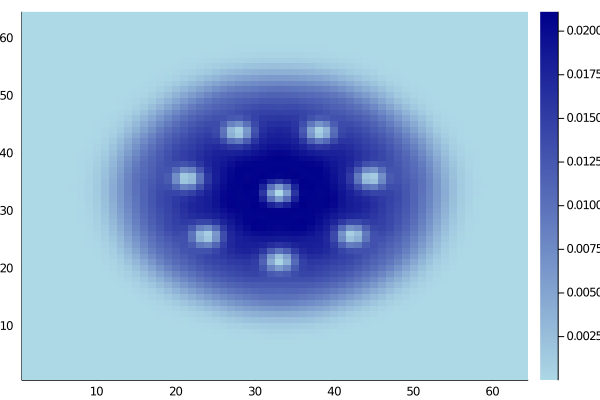

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)